# Input & Label

In [1]:
from rtmag.paper.load import load_input_label, MyModel

In [2]:
input_files, label_files = load_input_label("/mnt/f/isee_dataset/11158")
len(input_files), len(label_files)

(66, 66)

In [3]:
idx = 13
input_files[idx]

PosixPath('/mnt/f/isee_dataset/11158/input/input_11158_20110214_000000.npz')

# Model prediction & Label (NLFFF, Potential)

In [4]:
from time import time

In [5]:
# mm = MyModel("/home/mgjeon/space/workspace/base/pino_CC_Hnorm_Unit_2/best_model.pt")
mm = MyModel("/home/mgjeon/space/workspace/base/uno_pi_cc_hnorm_unit_aug/best_model.pt")
# mm2 = MyModel("/home/mgjeon/space/workspace/base/uno_pi_cc_hnorm_unit_aug/model_60.pt")

Model loaded from epoch 40


In [6]:
start_time = time()
b = mm.get_pred(input_files[idx])
print(f"{time() - start_time} seconds")

1.1152946949005127 seconds


In [7]:
start_time = time()
B = mm.get_label(label_files[idx])
print(f"{time() - start_time} seconds")

1.7098064422607422 seconds


In [8]:
start_time = time()
Bp = mm.get_pot(label_files[idx])
print(f"{time() - start_time} seconds")

1.7088534832000732 seconds


In [9]:
start_time = time()
dx, dy, dz, dV = mm.get_dV(input_files[idx])
print(f"{time() - start_time} seconds")

0.0037660598754882812 seconds


# Qualitative Evaluation

In [10]:
import matplotlib.pyplot as plt

/tmp/ipykernel_3407120/1463833667.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


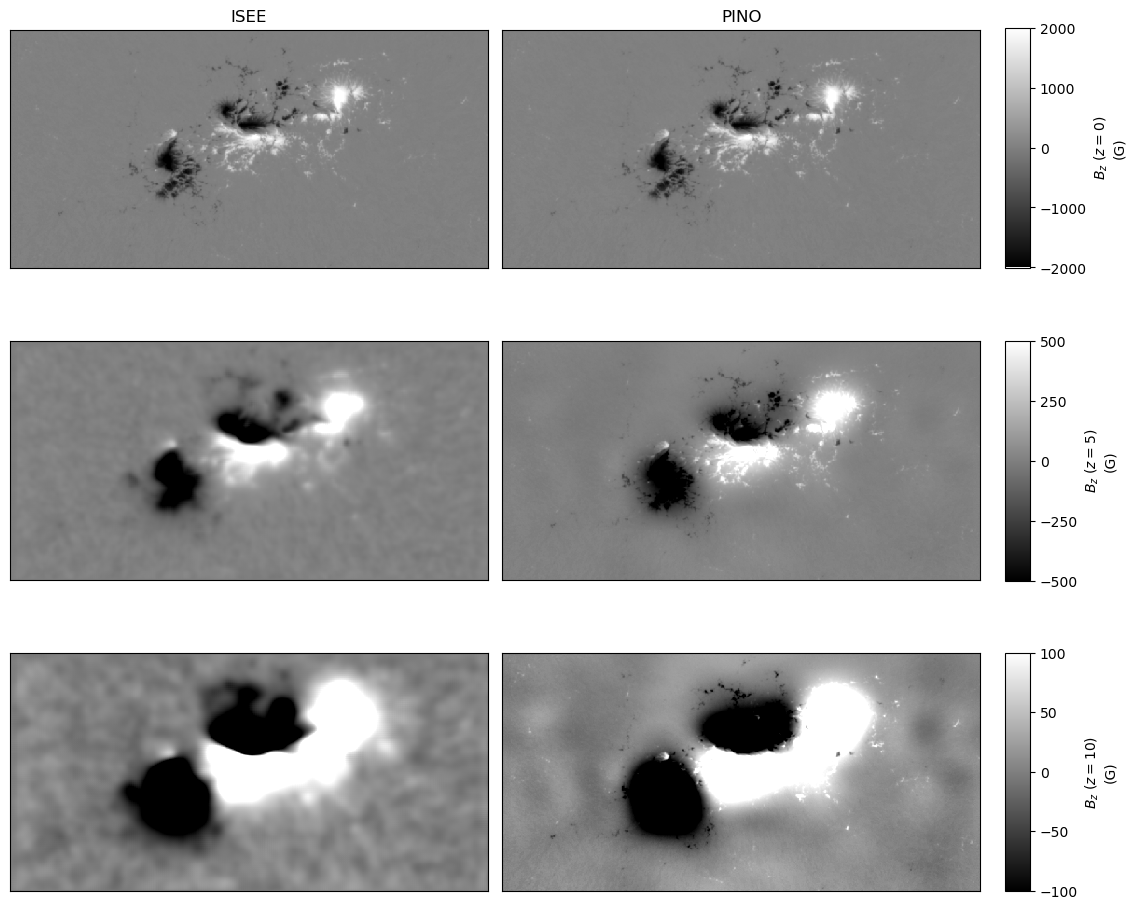

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

axs[0, 0].pcolormesh(B[:, :, 0, 2].T, cmap="gray", vmin=-2000, vmax=2000)
axs[0, 0].set_title("ISEE")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 0].set_aspect("equal")

im = axs[0, 1].pcolormesh(b[:, :, 0, 2].T, cmap="gray", vmin=-2000, vmax=2000)
axs[0, 1].set_title("PINO")
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
axs[0, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.693, 0.025, 0.24])
fig.colorbar(im, cax=cax, label='$B_z$ $(z=0)$\n(G)', ticks=[-2000, -1000, 0, 1000, 2000])

axs[1, 0].pcolormesh(B[:, :, 5, 2].T, cmap="gray", vmin=-500, vmax=500)
# axs[1, 0].set_title("ISEE $B_z$ $(z=5)$")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 0].set_aspect("equal")

im = axs[1, 1].pcolormesh(b[:, :, 5, 2].T, cmap="gray", vmin=-500, vmax=500)
# axs[1, 1].set_title("PINO $B_z$ $(z=5)$")
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
axs[1, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.38, 0.025, 0.24])
fig.colorbar(im, cax=cax, label='$B_z$ $(z=5)$\n(G)', ticks=[-500, -250, 0, 250, 500])
# fig.colorbar(im)

axs[2, 0].pcolormesh(B[:, :, 10, 2].T, cmap="gray", vmin=-100, vmax=100)
# axs[2, 0].set_title("ISEE $B_z$ $(z=10)$")
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])
axs[2, 0].set_aspect("equal")

im = axs[2, 1].pcolormesh(b[:, :, 10, 2].T, cmap="gray", vmin=-100, vmax=100)
# axs[2, 1].set_title("PINO $B_z$ $(z=10)$")
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])
axs[2, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
fig.colorbar(im, cax=cax, label='$B_z$ $(z=10)$\n(G)', ticks=[-100, -50, 0, 50, 100])
# fig.colorbar(im)


plt.tight_layout()
plt.show()

/tmp/ipykernel_3407120/759628588.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


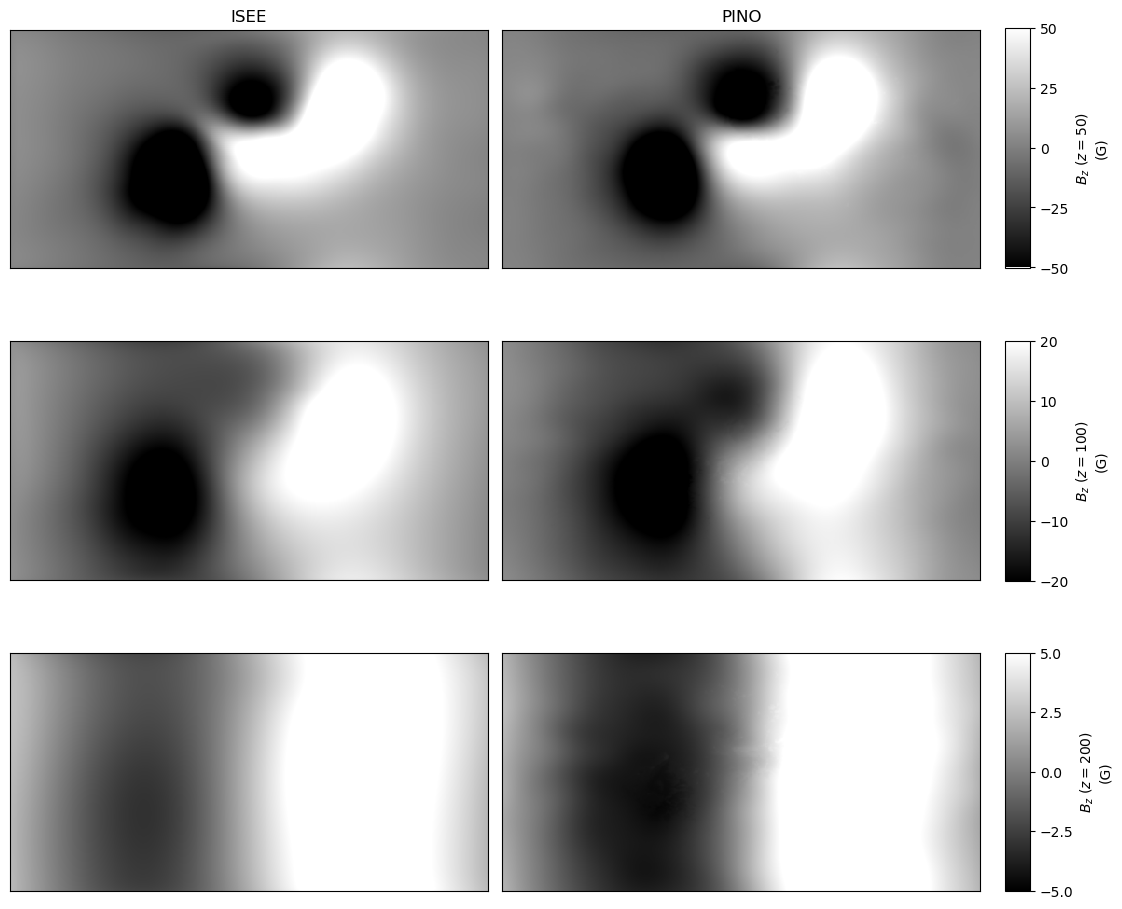

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

z = 50
vmm = 50
axs[0, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 0].set_title("ISEE")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 0].set_aspect("equal")

im = axs[0, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 1].set_title("PINO")
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
axs[0, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.693, 0.025, 0.24])
fig.colorbar(im, cax=cax, label=f'$B_z$ $(z={z})$\n(G)', ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])

z = 100
vmm = 20
axs[1, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 0].set_title("ISEE $B_z$ $(z=5)$")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 0].set_aspect("equal")

im = axs[1, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 1].set_title("PINO $B_z$ $(z=5)$")
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
axs[1, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.38, 0.025, 0.24])
fig.colorbar(im, cax=cax, label=f'$B_z$ $(z={z})$\n(G)', ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
# fig.colorbar(im)

z = 200
vmm = 5
axs[2, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 0].set_title("ISEE $B_z$ $(z=10)$")
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])
axs[2, 0].set_aspect("equal")

im = axs[2, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 1].set_title("PINO $B_z$ $(z=10)$")
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])
axs[2, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
fig.colorbar(im, cax=cax, label=f'$B_z$ $(z={z})$\n(G)', ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
# fig.colorbar(im)


plt.tight_layout()
plt.show()

In [14]:
from rtmag.paper.metric import vector_norm, current_density, energy

In [98]:
start_time = time()
j = current_density(b, dx, dy, dz)  # [mA/m^2]
j_map = vector_norm(j).sum(2) 
j_map *= 1e-7 # A/cm^2
j_map *= dz # A/cm
print(f"{time() - start_time} seconds")

0.8718171119689941 seconds


In [99]:
start_time = time()
J = current_density(B, dx, dy, dz)
J_map = vector_norm(J).sum(2) # A/m^2
J_map *= 1e-7 # A/cm^2
J_map *= dz # A/cm
print(f"{time() - start_time} seconds")

0.535193681716919 seconds


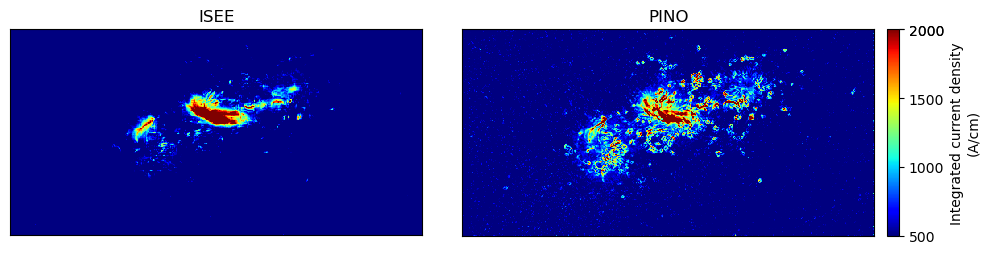

In [112]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

vmin = 500
vmax = 2000

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im = axs[0].pcolormesh(J_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].pcolormesh(j_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="3%", pad="3%")
fig.add_axes(cax)
fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])

plt.tight_layout()
plt.show()

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchmetrics import MeanSquaredError, ConcordanceCorrCoef

In [114]:
z_values = np.arange(b.shape[2])
mse_metrics = []
ccc_metrics = []

for z in z_values:
    mse_metrics.append( MeanSquaredError()(torch.tensor(b[:, :, z, :]).flatten(), torch.tensor(B[:, :, z, :]).flatten()).item())
    ccc_metrics.append( ConcordanceCorrCoef()(torch.tensor(b[:, :, z, :]).flatten(), torch.tensor(B[:, :, z, :]).flatten()).item() )

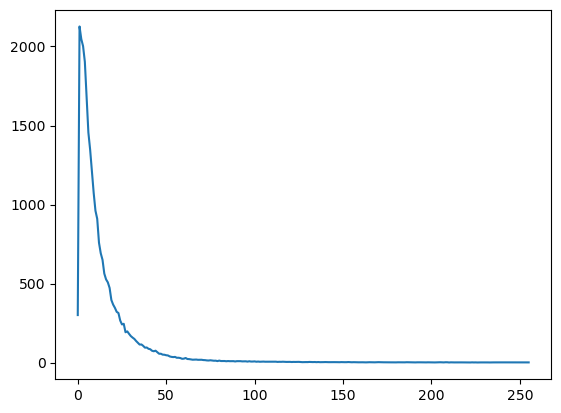

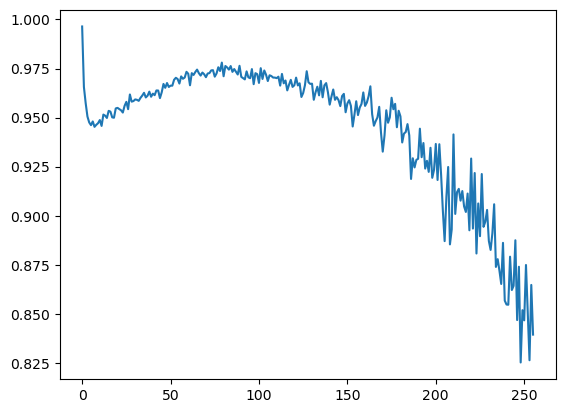

In [115]:
plt.plot(z_values, mse_metrics)
plt.show()

plt.plot(z_values, ccc_metrics)
plt.show()

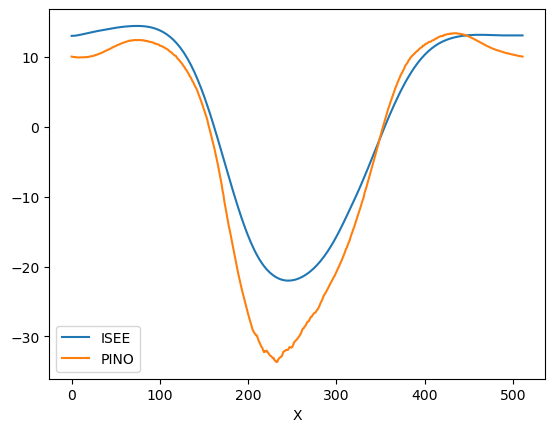

In [116]:
plt.plot(B[:, 128, 100, 0], label='ISEE')
plt.plot(b[:, 128, 100, 0], label='PINO')
plt.legend()
plt.xlabel("X")
plt.show()

In [117]:
from scipy.signal import savgol_filter

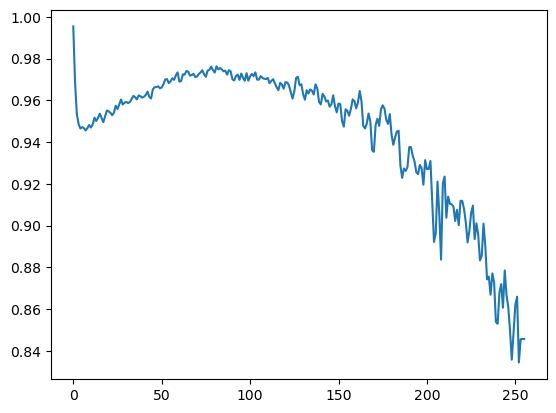

In [118]:
# plt.plot(z_values, ccc_metrics)
plt.plot(z_values, savgol_filter(ccc_metrics, 4, 2))
plt.show()

z=250


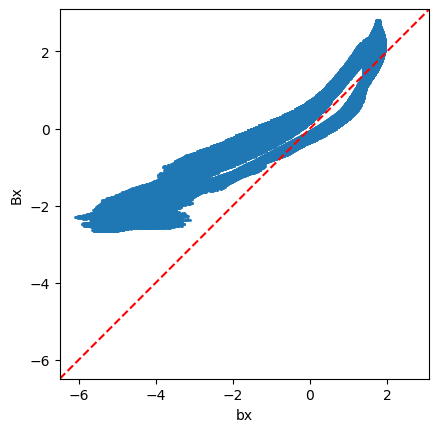

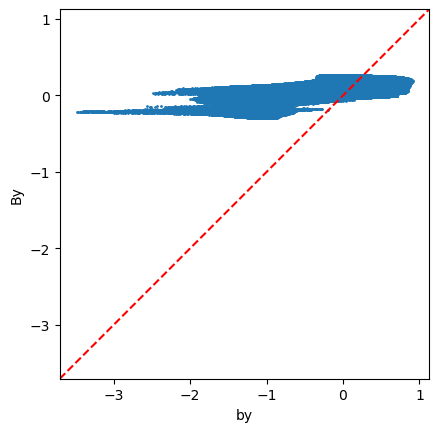

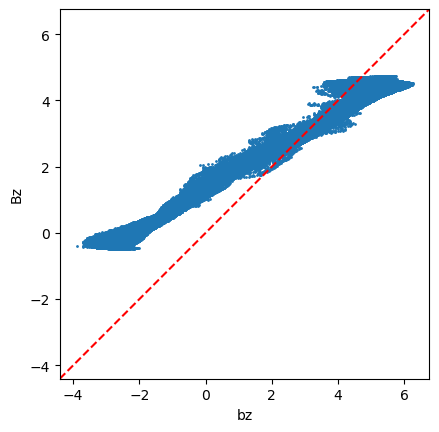

In [119]:
z = 250
n = 1

print(f"z={z}")

fig, ax = plt.subplots()
ax.scatter(b[::n, ::n, z, 0].flatten(), B[::n, ::n, z, 0].flatten(), s=1)
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = min(low_x, low_y)
high = max(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c="red", alpha=1)
ax.set_xlabel('bx')
ax.set_ylabel('Bx')
ax.set_xlim([low, high])
ax.set_ylim([low, high])
ax.set_aspect('equal')
plt.show()

fig, ax = plt.subplots()
ax.scatter(b[::n, ::n, z, 1].flatten(), B[::n, ::n, z, 1].flatten(), s=1)
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = min(low_x, low_y)
high = max(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c="red", alpha=1)
ax.set_xlabel('by')
ax.set_ylabel('By')
ax.set_xlim([low, high])
ax.set_ylim([low, high])
ax.set_aspect('equal')
plt.show()

fig, ax = plt.subplots()
ax.scatter(b[::n, ::n, z, 2].flatten(), B[::n, ::n, z, 2].flatten(), s=1)
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = min(low_x, low_y)
high = max(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c="red", alpha=1)
ax.set_xlabel('bz')
ax.set_ylabel('Bz')
ax.set_xlim([low, high])
ax.set_ylim([low, high])
ax.set_aspect('equal')
plt.show()